In [1]:
import requests
from matplotlib import pyplot as plt
from PIL import Image
from six.moves import urllib
from IPython.display import display
import base64
from io import BytesIO
import time

In [2]:
def get_image_bytes_from_url(url):
    res = requests.get(url)
    raw_image_bytes = res.content
    return raw_image_bytes

def get_image_bytes_from_url_alt(url):
    image = urllib.request.urlopen(url)
    raw_image_bytes = image.read()
    return raw_image_bytes

def get_image_bytes_from_file(file_path):
    image = open(file_path,'rb')
    raw_image_bytes = image.read()
    return raw_image_bytes

In [3]:
# server config
server_ip_address = "52.66.43.218"
server_port = "55558"

Took 49.91s
{"data":"a group of people are playing in the sand"}



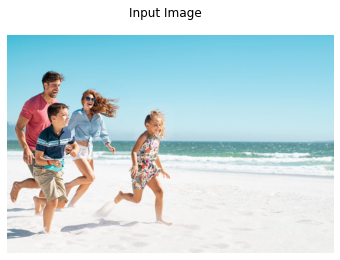

In [4]:
url = 'https://github.com/anr007/imgcap/blob/master/client/sample_input/sample_image1.jpg?raw=true'
image_bytes = get_image_bytes_from_url_alt(url)

# show image
image_obj = Image.open(BytesIO(image_bytes))
fig = plt.figure()
fig.suptitle('Input Image')
plt.axis('off')
plt.imshow(image_obj)

# encode raw image bytes
encoded_image_payload = base64.urlsafe_b64encode(image_bytes) 

# test the encoded payload
#decoded_image = Image.open(BytesIO(base64.urlsafe_b64decode(encoded_image_payload.decode('utf-8')))) # decode the byte-data as UTF-8 string 
#display(decoded_image)

payload = {"data":encoded_image_payload.decode('utf-8')} # send as UTF-8 decoded string
start = time.perf_counter()
res = requests.post("http://{}:{}/imgcap/predict/v2".format(server_ip_address,server_port), json=payload)
print(F"Took {time.perf_counter()-start:.2f}s")
print(res.text)

Took 53.23s
{"data":"a group of young girls are playing in the sand"}



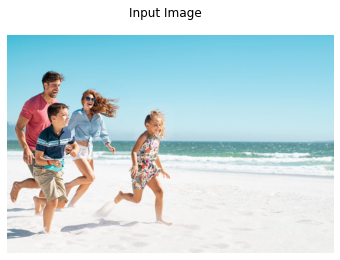

In [5]:
image_file_path = "sample_input/sample_image1.jpg"
image_bytes = get_image_bytes_from_file(image_file_path)

# show image
image_obj = Image.open(BytesIO(image_bytes))
fig = plt.figure()
fig.suptitle('Input Image')
plt.axis('off')
plt.imshow(image_obj)

# encode raw image bytes
encoded_image_payload = base64.urlsafe_b64encode(image_bytes)

# workaround 
#data = re.sub('^data:image/.+;base64,', '', data)

payload = {"data":encoded_image_payload.decode('utf-8')} # send as UTF-8 decoded string
start = time.perf_counter()
res = requests.post("http://{}:{}/imgcap/predict/v1".format(server_ip_address,server_port), json=payload)
print(F"Took {time.perf_counter()-start:.2f}s")
print(res.text)